#**Prediksi Cuaca dengan Menggunakan Algoritma Naive Bayes**



### 1. Load Data

In [1]:
# 1
import pandas as pd

# Membaca dataset dari file CSV
df = pd.read_csv("seattle-weather.csv")

# Menampilkan 15 baris pertama dataset
print(df.head(15))

          date  precipitation  temp_max  temp_min  wind  weather
0   2012-01-01            0.0      12.8       5.0   4.7  drizzle
1   2012-01-02           10.9      10.6       2.8   4.5     rain
2   2012-01-03            0.8      11.7       7.2   2.3     rain
3   2012-01-04           20.3      12.2       5.6   4.7     rain
4   2012-01-05            1.3       8.9       2.8   6.1     rain
5   2012-01-06            2.5       4.4       2.2   2.2     rain
6   2012-01-07            0.0       7.2       2.8   2.3     rain
7   2012-01-08            0.0      10.0       2.8   2.0      sun
8   2012-01-09            4.3       9.4       5.0   3.4     rain
9   2012-01-10            1.0       6.1       0.6   3.4     rain
10  2012-01-11            0.0       6.1      -1.1   5.1      sun
11  2012-01-12            0.0       6.1      -1.7   1.9      sun
12  2012-01-13            0.0       5.0      -2.8   1.3      sun
13  2012-01-14            4.1       4.4       0.6   5.3     snow
14  2012-01-15           



*   Terdapat 6 kolom, yaitu kolom date, precipitation, temp_max, temp_min, wind, dan weather. Dimana weather adalah kolom target/label dan sisanya adalam kolom class atau feature.
*   date: YYYY-MM-DD.
*   precipitation: Segala bentuk jatuhnya air ke permukaan daratan dan perairan terbuka dalam bentuk hujan, hujan es, salju, hujan es, atau gerimis.
*   temp_max: Suhu maksimum.
*   temp_min: Suhu minimum.
*   wind: Kecepatan angin.
*   weather: Cuaca









### 2. Pembersihan Data

In [2]:
#2

# Membaca dataset dari file CSV
df = pd.read_csv("seattle-weather.csv")

# Menampilkan informasi dataset
print("Informasi dataset sebelum pembersihan:")
print(df.info())

# Menghapus nilai-nilai kosong
df.dropna(inplace=True)

# Menghapus kolom "date"
df.drop("date", axis=1, inplace=True)

# Menghapus data duplikat
df.drop_duplicates(inplace=True)

# Menampilkan informasi dataset setelah pembersihan
print("\nInformasi dataset setelah pembersihan:")
print(df.info())

Informasi dataset sebelum pembersihan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB
None

Informasi dataset setelah pembersihan:
<class 'pandas.core.frame.DataFrame'>
Index: 1453 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1453 non-null   float64
 1   temp_max       1453 non-null   float64
 2   temp_min       1453 non-null   float64
 3   wind           1453 non-null   float64
 4   weather        1453 non-null   obje

*   Menghapus kolom yang tidak akan dibutuhkan untuk prediksi, yaitu kolom date.
*   Menghapus data yang memiliki duplikat.


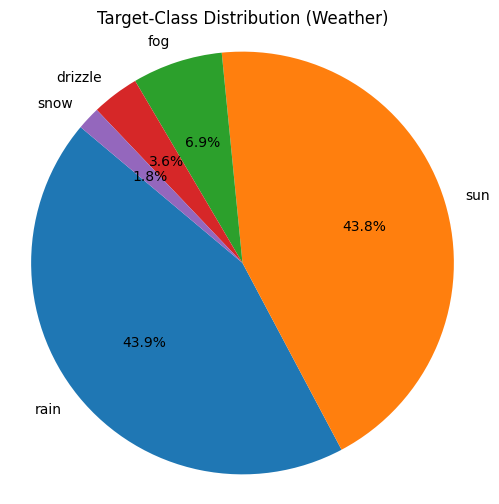

In [3]:
#3
import matplotlib.pyplot as plt

# Membaca dataset dari file CSV
df = pd.read_csv("seattle-weather.csv")

# Menampilkan distribusi target-class dalam diagram pie
class_counts = df['weather'].value_counts()
labels = class_counts.index
sizes = class_counts.values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Target-Class Distribution (Weather)')
plt.axis('equal')  # Membuat diagram pie menjadi lingkaran
plt.show()


Visualisasi distribusi data dala bentuk diagram pie.

### 3. Transformasi Data

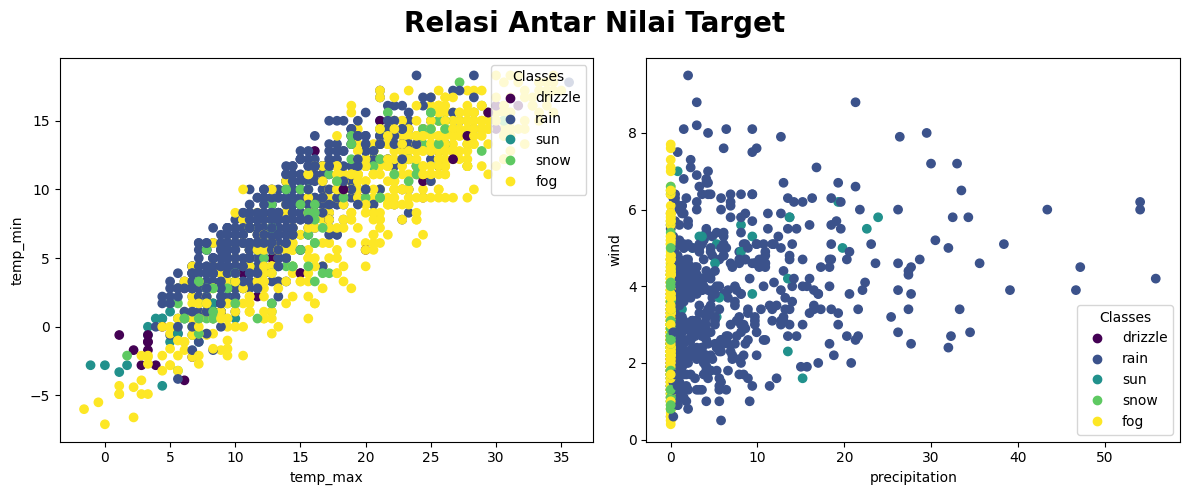

In [4]:
#4

target_names = df['weather'].unique()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Membuat kolom target dengan mengganti nilai pada kolom 'weather'
target = df['weather'].replace({
    'drizzle': 0,
    'rain': 1,
    'snow': 2,
    'fog': 3,
    'sun': 4
})

# Visualisasi relasi fitur temp_max dan temp_min
a_scatter =axs[0].scatter(df['temp_max'], df['temp_min'],
c=target)
axs[0].set(xlabel="temp_max", ylabel="temp_min")
axs[0].legend(a_scatter.legend_elements()[0], target_names,
loc="upper right", title="Classes")

# Visualisasi relasi fitur precipitation dan wind
b_scatter = axs[1].scatter(df['precipitation'], df['wind'],
c=target)
axs[1].set(xlabel="precipitation", ylabel="wind")
axs[1].legend(b_scatter.legend_elements()[0], target_names,
loc="lower right", title="Classes")


fig.suptitle("Relasi Antar Nilai Target", fontsize=20, fontweight="bold")
plt.tight_layout()
plt.show()



*   Membuat kolom target dengan mengganti nilai pada kolom 'weather'.
*   Visualisasi data dalam bentuk diagram pencar.

In [8]:
#5

from sklearn.model_selection import train_test_split

# Memisahkan fitur (X) dan target (y)
x = df.drop(columns=['weather'])  # Menghilangkan kolom target dari fitur
y = df['weather']

# Membagi dataset menjadi train-set (70%) dan test-set (30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Output ukuran train-set dan test-set
print("Ukuran train-set (x_train):", x_train.shape)
print("Ukuran test-set (x_test):", x_test.shape)
print("Ukuran train-set (y_train):", y_train.shape)
print("Ukuran test-set (y_test):", y_test.shape)

Ukuran train-set (x_train): (1017, 4)
Ukuran test-set (x_test): (436, 4)
Ukuran train-set (y_train): (1017,)
Ukuran test-set (y_test): (436,)


*   Memisahkan fitur (X) dan target (y).
*   Membagi dataset menjadi train-set (70%) dan test-set (30%).

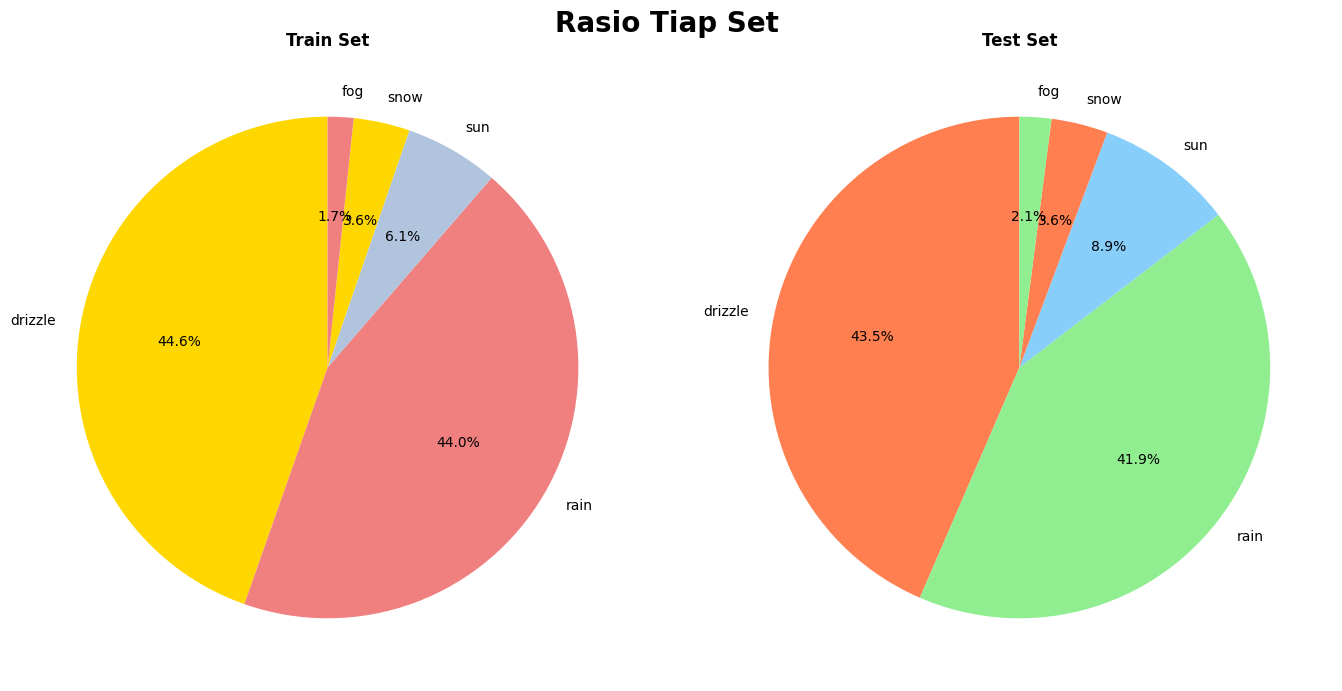

In [6]:
#6
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
target_names = df['weather'].unique()
colors1 = ['gold', 'lightcoral', 'lightsteelblue']
colors2 = ['coral', 'lightgreen', 'lightskyblue']

#Train dataset
axs[0].pie(y_train.value_counts(), labels=target_names,
colors=colors1, autopct='%1.1f%%', startangle=90)
axs[0].set_title("Train Set", fontweight="bold")

#Test dataset
axs[1].pie(y_test.value_counts(), labels=target_names,
colors=colors2, autopct='%1.1f%%', startangle=90)
axs[1].set_title("Test Set", fontweight="bold")

fig = fig.suptitle("Rasio Tiap Set", fontsize=20,
fontweight="bold")
plt.tight_layout()



*   Pendistribusian data ke dalam set pelatihan atau pengujian.
*   Visualisasi rasio set dalam bentu diagram pie.



### 4. Mining Data

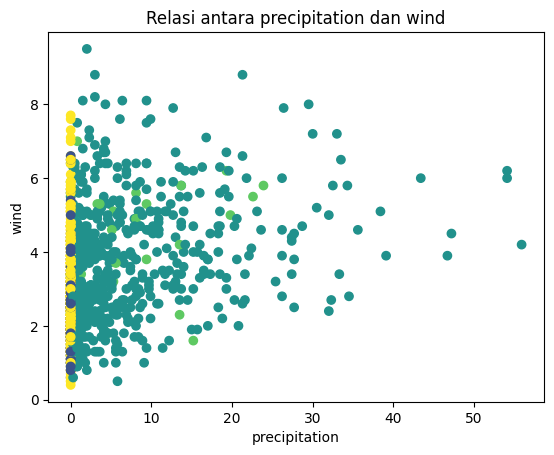

<Figure size 640x480 with 0 Axes>

Akurasi Prediksi dengan Naive Bayes: 0.8509174311926605 atau 85.09%


In [12]:
#7

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Visualisasi relasi fitur precipitation dan wind
plt.scatter(df['precipitation'], df['wind'], c=df['weather'].astype('category').cat.codes, cmap='viridis')
plt.xlabel('precipitation')
plt.ylabel('wind')
plt.title('Relasi antara precipitation dan wind')
plt.show()

fig.suptitle("Rasio Tiap Set", fontsize=20, fontweight="bold")
plt.tight_layout()
plt.show()

# Membuat model Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Melakukan prediksi
y_pred = naive_bayes.predict(X_test)

# Menghitung akurasi prediksi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Prediksi dengan Naive Bayes: {accuracy} atau {accuracy*100:.2f}%")



*   Visualisasi relasi fitur precipitation dan wind dalam bentuk diagram pencar.
*   Memprediksi data dengan menggunkan ALgoritma Naive Bayes dengan hasil akurasi 85.09%.

